# Homework 2
---
Jordan Ott

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# Problem 1

In [2]:
data = np.genfromtxt("data/curve80.txt",delimiter=None)
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it ' s 2-dimensional
Y = data[:,1]
# doesn ' t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
print(Xtr.shape,Xte.shape,Ytr.shape,Yte.shape)

(60, 1) (20, 1) (60,) (20,)


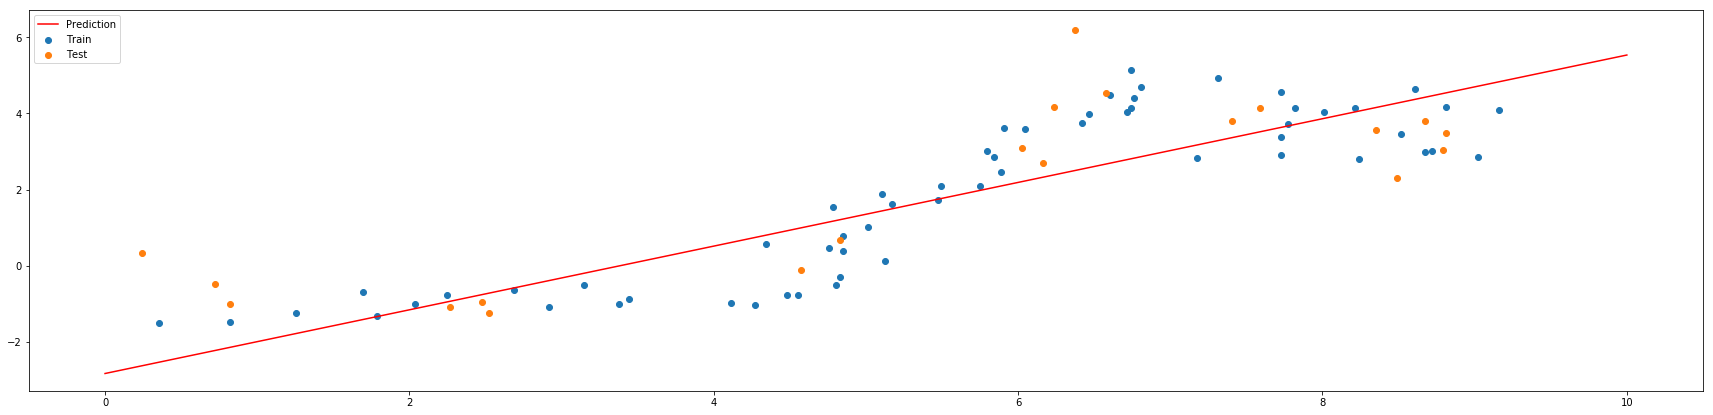

[[-2.82765049  0.83606916]]
Train MSE: 481.82290814927654 Test MSE: 71.95657765819331


In [3]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs ) # make predictions at xs

fig=plt.figure(figsize=(30,7))
plt.scatter(Xtr, Ytr, label='Train')
plt.scatter(Xte, Yte, label='Test')
plt.plot(xs,ys, label='Prediction',color='r')
plt.legend()
plt.show()

print(lr.theta)

tr_mse = np.sum((Ytr - lr.predict(Xtr))**2) / float(len(Xtr))
te_mse = np.sum((Yte - lr.predict(Xte))**2) / float(len(Xtr))

print('Train MSE:',tr_mse,'Test MSE:',te_mse)

In [4]:
def Phi(X,d,params):
    return ml.transforms.rescale( ml.transforms.fpoly(X, d,False), params)[0]

def train_models_of_degree(Xtr,Ytr,Xte,Yte,degrees=[1,3,5,7,10,18],plot=True):
    errors = [[0,0] for d in degrees]
    xs = np.linspace(0,10,200)[:,np.newaxis]
    
    for d,i in zip(degrees,range(len(degrees))):
        XtrP = ml.transforms.fpoly(Xtr, d, bias=False)
        XtrP,params = ml.transforms.rescale(XtrP)

        lr = ml.linear.linearRegress( XtrP, Ytr )
        XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,d,False), params)

        XsP = Phi(xs,d,params)
        if plot:
            plt.plot(xs, lr.predict(XsP), label=str(d))

        errors[i][0] = np.sum((Ytr - lr.predict(XtrP))**2) / float(len(Xtr)) # train
        errors[i][1] = np.sum((Yte - lr.predict(XteP))**2) / float(len(Xtr)) # test
        
    return errors

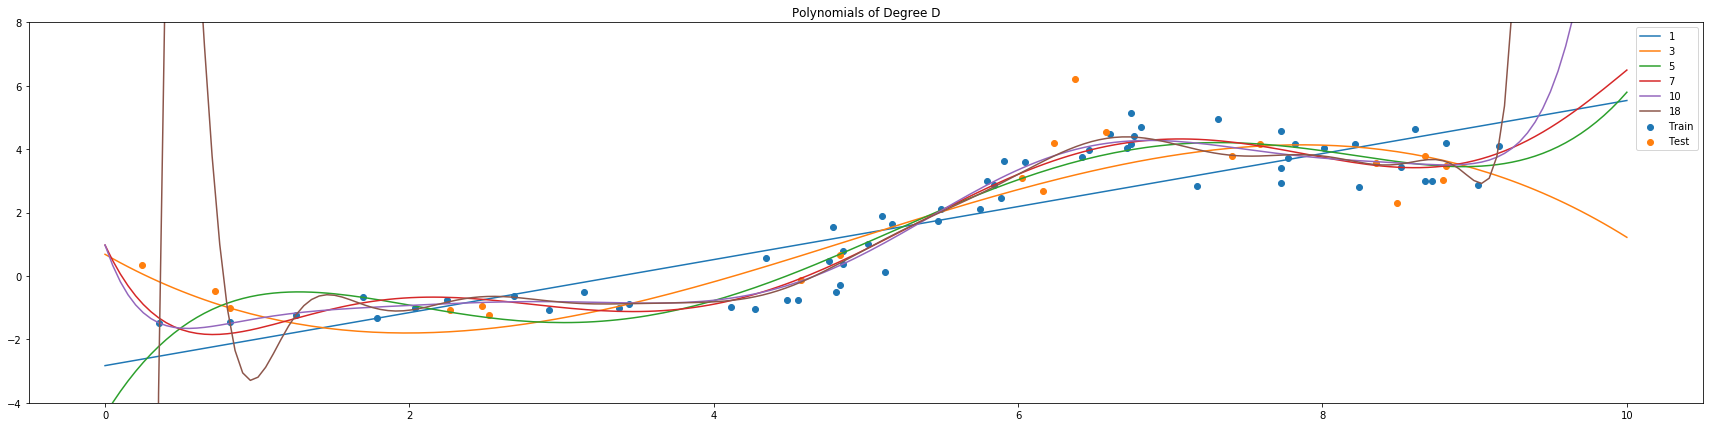

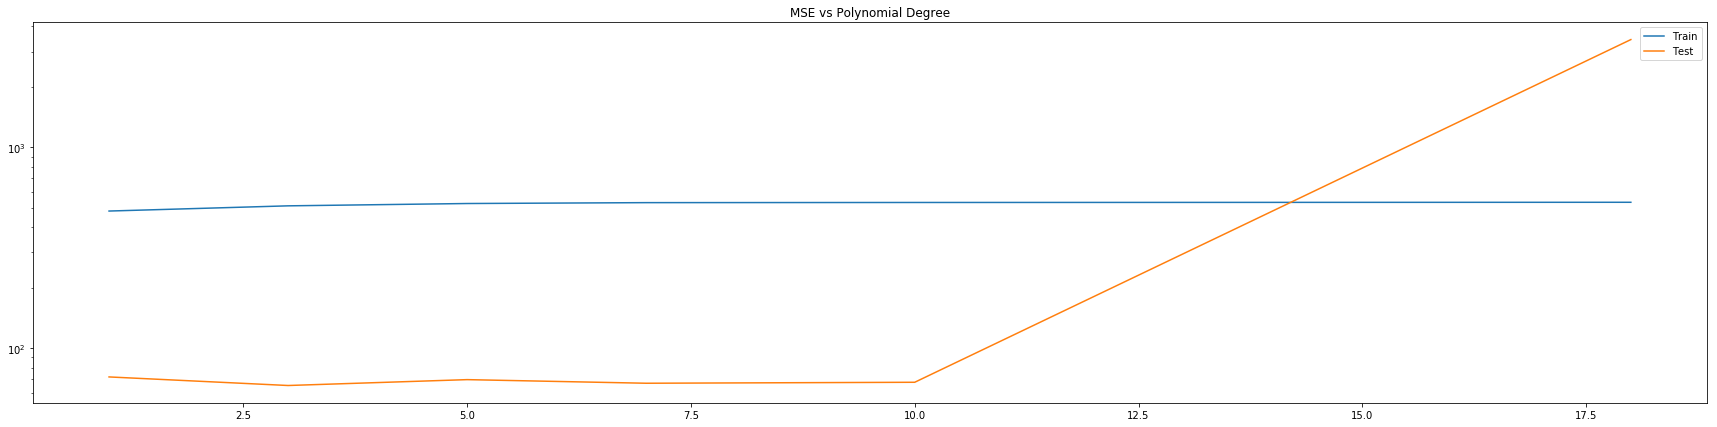

In [5]:
fig=plt.figure(figsize=(30,7))

degrees = [1,3,5,7,10,18]

plt.scatter(Xtr, Ytr, label='Train')
plt.scatter(Xte, Yte, label='Test')

errors = train_models_of_degree(Xtr,Ytr,Xte,Yte,degrees=degrees)

plt.legend()
plt.title('Polynomials of Degree D')
plt.ylim(-4,8)
plt.show()

fig=plt.figure(figsize=(30,7))

errors = np.array(errors)
plt.semilogy(degrees, errors[:,0],label='Train')
plt.semilogy(degrees, errors[:,1],label='Test')
plt.legend()
plt.title('MSE vs Polynomial Degree')
plt.show()

I'd recommend the polynomial of degree 5. It achieves low train and test errors, relative to other polynomials. It also seems to follow the correct curvature to extrapolate beyond the training data. Where as the 3rd degree polynomial is concave down beyond the training range as the x values increase.

# Problem 2

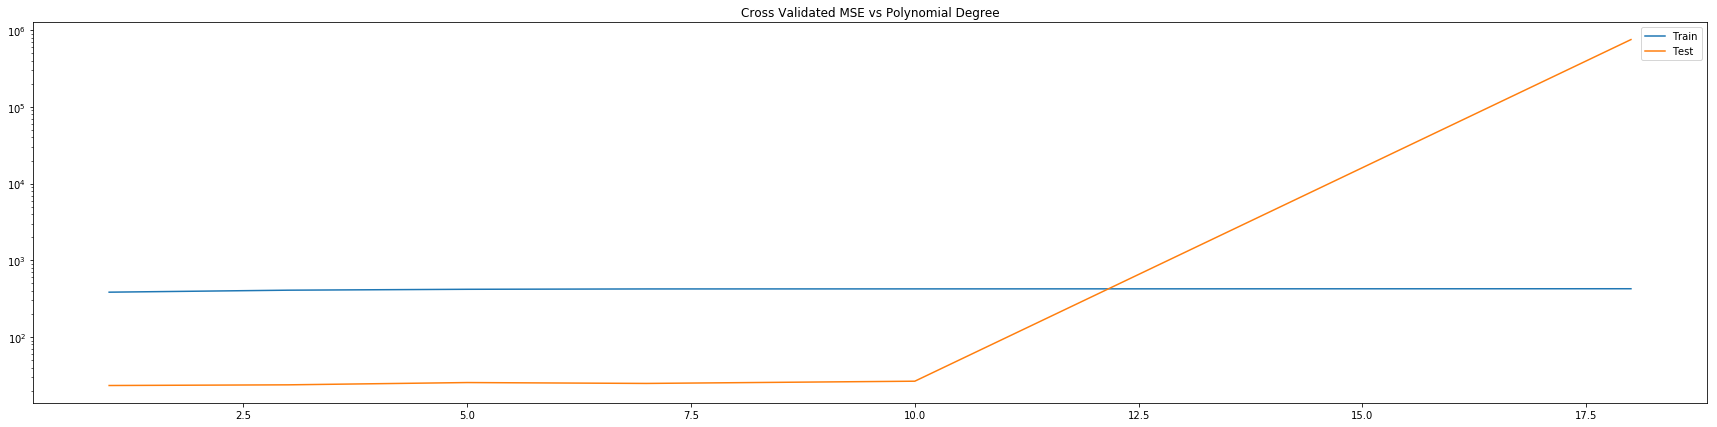

In [6]:
nFolds = 5;
J = [None for _ in range(nFolds)]
for iFold in range(nFolds):
    Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation
    error = train_models_of_degree(Xti,Yti,Xvi,Yvi,degrees=degrees,plot=False)
    J[iFold] = error

mean_fold_error = np.mean(np.array(J),axis=0)

fig=plt.figure(figsize=(30,7))
plt.semilogy(degrees, mean_fold_error[:,0],label='Train')
plt.semilogy(degrees, mean_fold_error[:,1],label='Test')
plt.legend()
plt.title('Cross Validated MSE vs Polynomial Degree')
plt.show()

**Q:** How do the MSE estimates from five-fold cross-validation compare to the MSEs evaluated on the actual test
data (Problem 1)?  
**A:** The MSEs are mostly the same except for the 18th degree polynomial, the cross validated errors are much higher 

**Q:** Which polynomial degree do you recommend based on five-fold cross-validation error?  
**A:** Degree 1, it achieves the lowest train and test error over the 5 folds

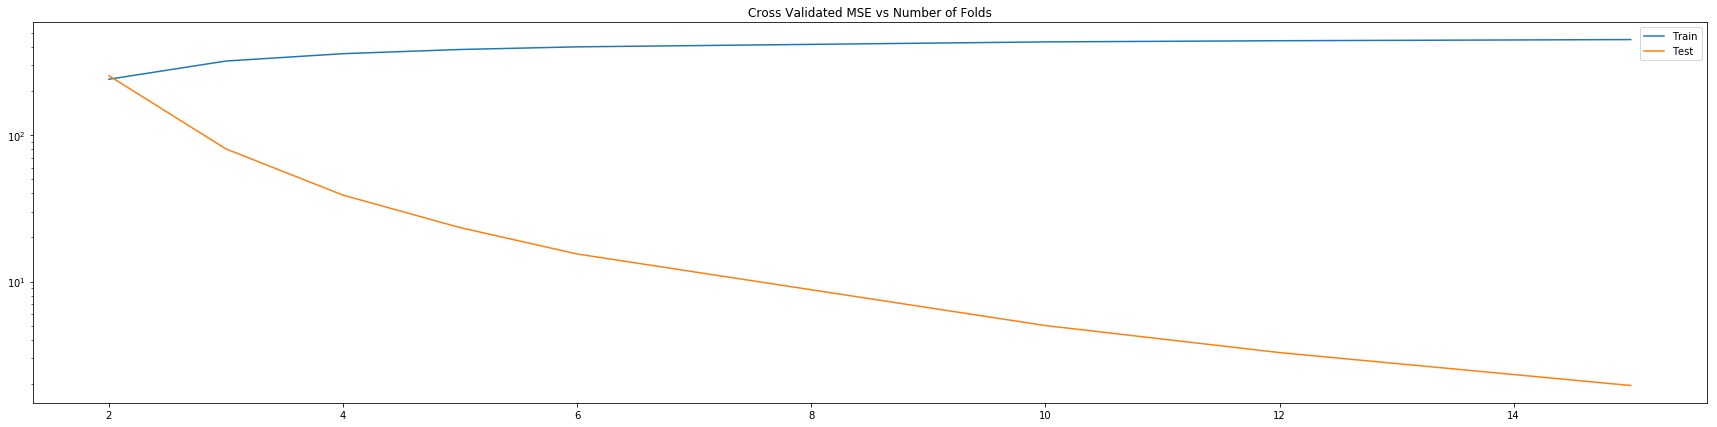

In [7]:
folds = [2, 3, 4, 5, 6, 10, 12, 15]
errors = []
for nFolds in folds:
    J = [None for _ in range(nFolds)]
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation
        error = train_models_of_degree(Xti,Yti,Xvi,Yvi,degrees=[1],plot=False)
        J[iFold] = error
    errors.append(np.mean(np.array(J),axis=0))

mean_fold_error = np.array(errors)

fig=plt.figure(figsize=(30,7))
plt.semilogy(folds, mean_fold_error[:,:,0],label='Train')
plt.semilogy(folds, mean_fold_error[:,:,1],label='Test')
plt.legend()
plt.title('Cross Validated MSE vs Number of Folds')
plt.show()

**Q:** What pattern do you observe, and how do you explain it?  
**A:** The test error decreases as the number of folds increases. This is because as the number of folds increases the size of the validation set decreases. Meaning the model has more training data. 

# Statement of Collaboration
I did not collaborate with anyone.